# <center> 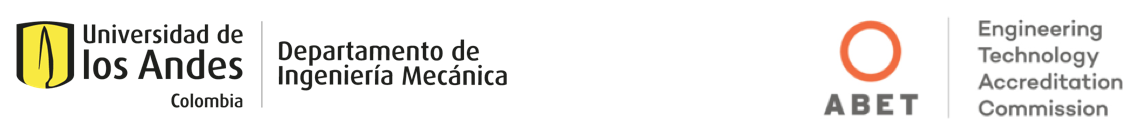
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 8-Modelamiento de Sistemas físicos

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivo demostrar su manejo en el planteamiento de ecuaciones que modelan un sistema físico y su aplicación simbólica y numérica.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller8_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Flujo en tuberías

# <center> 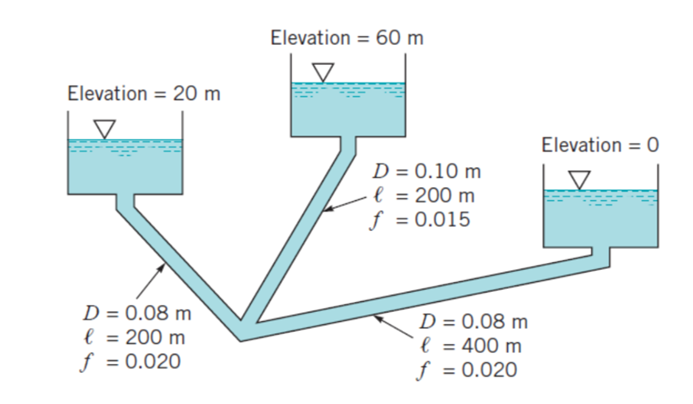 

Utilizando la ecuación de Bernoulli y el modelo de fricción Darcy-Weisbch, plantee la ecuación que defina el flujo en cada tubería. Genere el sistema de ecuaciones que describe el problema y resuelva para encontrar el flujo que tendría cada tubería bajo estas condiciones iniciales. Recuerde que la ecuación de bernoulli en forma de cabeza para dos puntos conectados en una tubería corresponde a: 

<font size="6">$$\frac{P_a}{\rho{g}}+\frac{v_a^2}{2g}+h_a=\frac{P_b}{\rho{g}}+\frac{v_b^2}{2g}+h_b+h_l$$  </font>

Donde:

$P_A$ corresponde la presión en un punto A.

$\rho$ corresponde a la densidad del fluido que se está analizando.

$g$ corresponde a la gravedad.

$v_a$ corresponde a la velocidad del fluido en A.

$h_a$ corresponde a la elevación del fluido en A.

Lo mismo aplica para b. Además h<sub>f</sub> corresponde con la cabeza que representa la pérdida de fricción. En el caso del modelo Darcy-Weisbch esta corresponde a:

<font size="6">$$h_l= \frac{f{\ell}{v^2}}{2Dg}$$ </font>

Donde:

$f$ corresponde al factor de fricción.

$\ell$ corresponde a la longitud de tubería desde A hasta B.

$v$ corresponde con la velocidad en la tubería desde A hasta B.

$D$ corresponde con el diámetro de la tubería desde A hasta B.

$g$ corresponde a la gravedad.

El término h<sub>l</sub> va en la ecuación de bernoulli en el punto al cual llega el fluido. Es decir, si el fluido va en el senito A->B, h<sub>l</sub> va en el lado de B.

Por último, cuando hay algun tipo de junta en la tubería donde hay uniones o bifurcaciones de fluido, se debe cumplir la conservación de la masa, que en este caso se ve de la siguiente forma:

<font size="6">$$ \sum{Q_{in}}=\sum{Q_{out}}$$</font>

Donde Q es el caudal, que se relaciona con la velocidad del fluido con: 

<font size="6">$$ Q=\frac{vD^2}{4}$$</font>

<span style="color: #1AA3D9">Importante: </span>Analice cuales de las variables son despreciables o son 0 para simplificar el ejercicio. Adicionalmente, plantee las suficientes ecuaciones con el número de incógnitas que tenga.

     Tubería  Caudal (m³/s)
0  izquierda       0.013943
1      medio       0.048399
2    derecha       0.062342


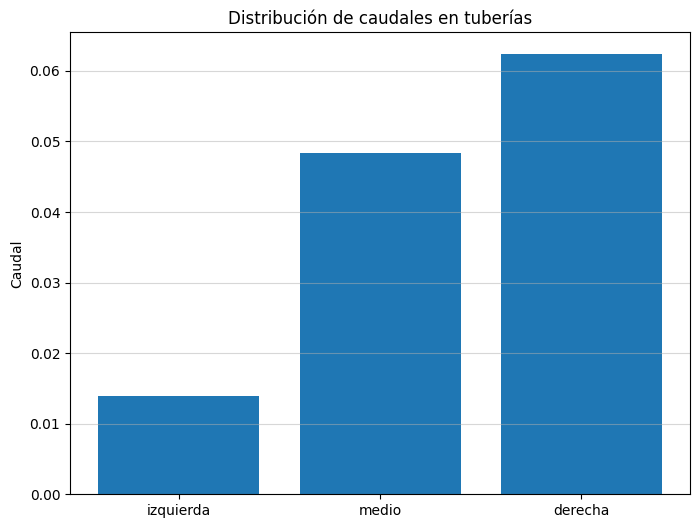

In [ ]:
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

Q1, Q2, Q3 = sp.symbols("Q1 Q2 Q3")
g = 9.81

t1 = (0.08,200,0.020,20) 
t2 = (0.10,200,0.015,60)  
t3 = (0.08,400,0.020,0)   

def eq(Q, D, L, f, h):
    v = 4*Q/(sp.pi*D**2)
    hf = f*L/D * v**2/(2*g)
    return h - v**2/(2*g) - hf

e1 = eq(Q1,*t1)
e2 = eq(Q2,*t2)
e3 = sp.Eq(Q1+Q2,Q3)

sol = sp.nsolve([e1,e2,e3],[Q1,Q2,Q3],[0.01,0.01,0.02])

q1, q2, q3 = [float(val) for val in sol]

tabla = pd.DataFrame({
    "Tubería": ["izquierda","medio","derecha"],
    "Caudal (m³/s)": [q1,q2,q3]})

print(tabla)

plt.figure(figsize=(8,6))
plt.bar(["izquierda","medio","derecha"],[q1,q2,q3])
plt.ylabel("Caudal")
plt.title("Distribución de caudales en tuberías")
plt.grid(axis="y", alpha=0.5)
plt.show()

___
### <span style="color: #1AA3D9"><center> Item 2: Modelos dinámicos con masas y resortes

# <center>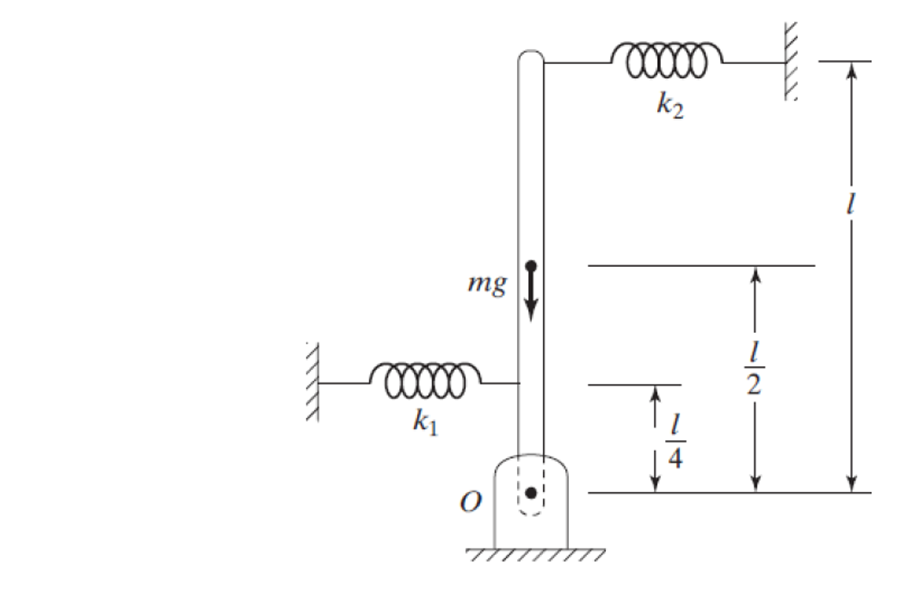

Para el sistema presentado en la figura, defina las ecuaciones que permiten relacionar el ángulo de la barra con el estado de compresión/extensión de los resortes. Suponga que los resortes se encuentran en su longitud natural cuando están en la posición mostrada Utilice la relación entre los torques y la aceleración angular de la barra para encontrar una ecuación diferencial que describa el movimiento de la barra. Plantee la ecuación diferencial analizando momentos como una barra girando con respecto a uno de sus extremos.

___
### <span style="color: #1AA3D9"><center> Item 3: Modelos cinemáticos en robótica

# <center> 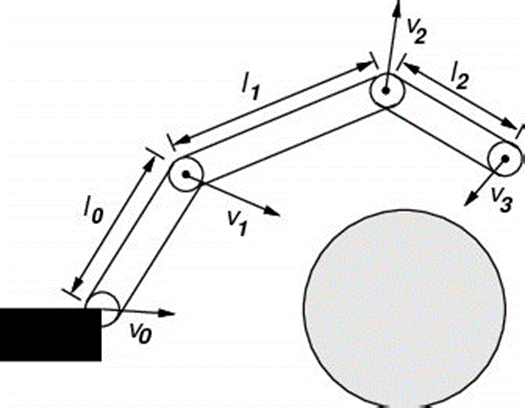

La imagen representa un brazo robótico con las dimensiones planteadas por las variables l<sub>0</sub>, l<sub>1</sub> y l<sub>2</sub>. 

1. Describa la posición de la punta del brazo en función de los ángulos de cada articulación, utilice el esqueleto brindado a continuación


In [1]:
import math


l0 = 2.0   
l1 = 1.5
l2 = 1.0

def pos_punta(theta0, theta1, theta2, degrees=False):
    
    
    if degrees:
        theta0 = math.radians(theta0)
        theta1 = math.radians(theta1)
        theta2 = math.radians(theta2)

    t0 = theta0
    t01 = theta0 + theta1
    t012 = theta0 + theta1 + theta2

    x = l0 * math.cos(t0) + l1 * math.cos(t01) + l2 * math.cos(t012)
    y = l0 * math.sin(t0) + l1 * math.sin(t01) + l2 * math.sin(t012)
    return x, y


if __name__ == "__main__":
  
    th0, th1, th2 = 30, 45, -20
    x, y = pos_punta(th0, th1, th2, degrees=True)
    print(f"Posición punta para θ = ({th0}°, {th1}°, {th2}°): x = {x:.4f}, y = {y:.4f}")


Posición punta para θ = (30°, 45°, -20°): x = 2.6939, y = 3.2680


2. Utilice el modelo planteado y a partir de valores numéricos definidos por usted, grafique el brazo en tres posiciones diferentes para una serie de ángulos conocidos. Utilice un gráfico de tipo <span style="color: #1AA3D9">subplot </span>como el siguiente:

# <center> 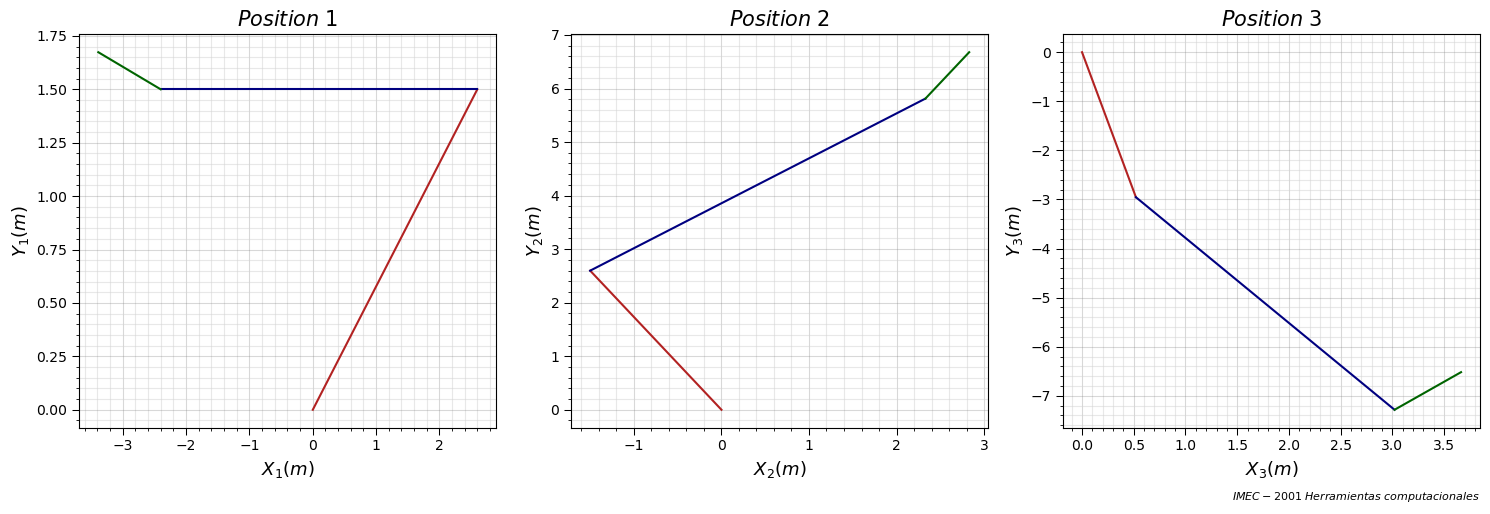

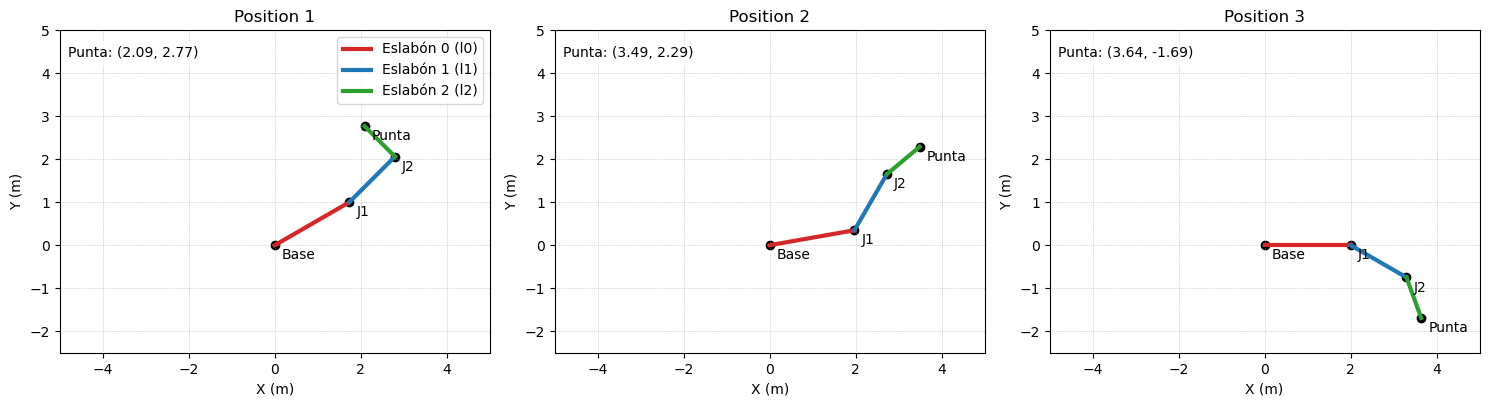

In [2]:
import numpy as np
import matplotlib.pyplot as plt




def joints_positions(theta0, theta1, theta2):
    t0 = theta0
    t01 = theta0 + theta1
    t012 = theta0 + theta1 + theta2

    x0, y0 = 0.0, 0.0                    
    x1 = x0 + l0 * np.cos(t0)           
    y1 = y0 + l0 * np.sin(t0)
    x2 = x1 + l1 * np.cos(t01)          
    y2 = y1 + l1 * np.sin(t01)
    x3 = x2 + l2 * np.cos(t012)         
    y3 = y2 + l2 * np.sin(t012)

    return (x0, y0), (x1, y1), (x2, y2), (x3, y3)


pos_angles_deg = [
    (30, 15, 90),    
    (10, 50, -20),   
    (0,  -30, -40)   
]


pos_angles = [(np.deg2rad(a), np.deg2rad(b), np.deg2rad(c)) for (a,b,c) in pos_angles_deg]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Position 1', 'Position 2', 'Position 3']


colors = ['tab:red', 'tab:blue', 'tab:green']


reach = l0 + l1 + l2
lim = reach + 0.5

for ax, angs, title in zip(axes, pos_angles, titles):
    (x0,y0), (x1,y1), (x2,y2), (x3,y3) = joints_positions(*angs)


    ax.plot([x0, x1], [y0, y1], color=colors[0], linewidth=3, label='Eslabón 0 (l0)')
    ax.plot([x1, x2], [y1, y2], color=colors[1], linewidth=3, label='Eslabón 1 (l1)')
    ax.plot([x2, x3], [y2, y3], color=colors[2], linewidth=3, label='Eslabón 2 (l2)')

 
    ax.scatter([x0,x1,x2,x3], [y0,y1,y2,y3], c='k')

    ax.annotate('Base', (x0, y0), textcoords="offset points", xytext=(5,-10))
    ax.annotate('J1', (x1, y1), textcoords="offset points", xytext=(5,-10))
    ax.annotate('J2', (x2, y2), textcoords="offset points", xytext=(5,-10))
    ax.annotate('Punta', (x3, y3), textcoords="offset points", xytext=(5,-10))


    ax.text(0.02, 0.95, f"Punta: ({x3:.2f}, {y3:.2f})", transform=ax.transAxes,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    ax.set_aspect('equal')
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim/2, lim)  
    ax.set_title(title)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')


axes[0].legend(loc='upper right')

plt.tight_layout()
plt.show()


3.	Utilice la función <span style="color: #1AA3D9">minimize</span> de la clase anterior para determinar los ángulos de las articulaciones que producirían una posición de la punta conocida.

In [3]:

from scipy.optimize import minimize




def pos_punta_from_thetas(thetas):

    t0, t1, t2 = thetas
    t01 = t0 + t1
    t012 = t01 + t2
    x0, y0 = 0.0, 0.0
    x1 = x0 + l0 * np.cos(t0); y1 = y0 + l0 * np.sin(t0)
    x2 = x1 + l1 * np.cos(t01); y2 = y1 + l1 * np.sin(t01)
    x3 = x2 + l2 * np.cos(t012); y3 = y2 + l2 * np.sin(t012)
    return np.array([x3, y3])


def encontrar_angulos(xpos, ypos, initial_guess=None, tol=1e-8):

    target = np.array([xpos, ypos])

    def objective(thetas):
        p = pos_punta_from_thetas(thetas)
        return np.sum((p - target)**2)  


    if initial_guess is None:
        initial_guess = np.array([0.0, 0.0, 0.0])
    else:
        initial_guess = np.array(initial_guess, dtype=float)


    bounds = [(-np.pi, np.pi), (-np.pi, np.pi), (-np.pi, np.pi)]


    res = minimize(objective, initial_guess, method='SLSQP', bounds=bounds,
                   options={'ftol': tol, 'maxiter': 1000, 'disp': False})

    if not res.success:
    
        print("F:", res.message)

    thetas_opt = res.x


    thetas_opt = (thetas_opt + np.pi) % (2*np.pi) - np.pi

    return tuple(thetas_opt)



if __name__ == "__main__":

    objetivo = (2.0, 1.0)   

    thetas = encontrar_angulos(objetivo[0], objetivo[1], initial_guess=[0.2, 0.5, -0.3])
    print("Ángulos encontrados (rad):", thetas)
    print("Ángulos encontrados (deg):", tuple(np.degrees(thetas)))


    punta = pos_punta_from_thetas(thetas)
    print("Posición punta obtenida:", punta)
    print("Error (euclid):", np.linalg.norm(punta - np.array(objetivo)))


Ángulos encontrados (rad): (np.float64(-0.7041316776663882), np.float64(2.3579944573590286), np.float64(-0.7266880327505287))
Ángulos encontrados (deg): (np.float64(-40.34377335175013), np.float64(135.1031305219131), np.float64(-41.63615729926984))
Posición punta obtenida: [1.99998787 1.00001114]
Error (euclid): 1.6469476079787498e-05


___
### <span style="color: #1AA3D9"><center> Bono (+1.0)

 Produzca una animación que muestre el robot pasando por una circunferencia de la siguiente forma:
 
# <center> 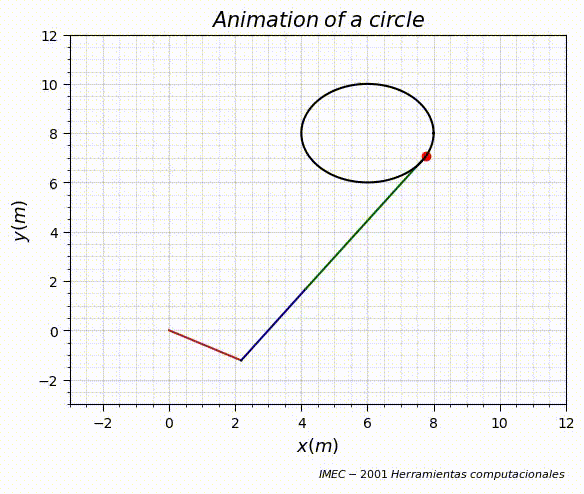

 
Recuerde que en el contenido de la clase de visualización se encuentra disponible como realizar animaciones con el uso de la librería <span style="color: #1AA3D9"> ipywidgets

In [5]:
%matplotlib widget

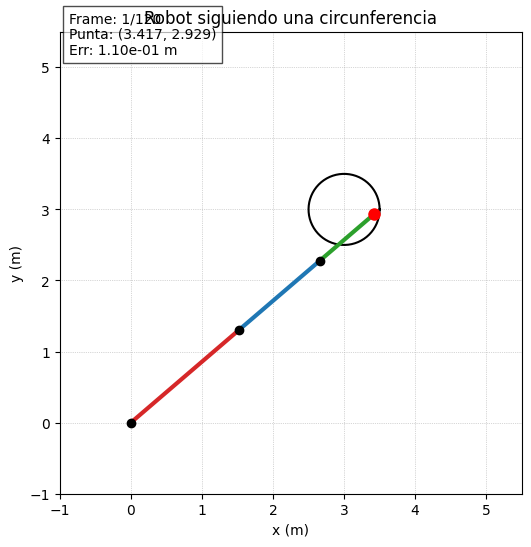

In [12]:

from scipy.optimize import least_squares
from ipywidgets import Play, IntSlider, jslink, HBox, VBox
from IPython.display import display



reach = l0 + l1 + l2

def pos_punta_from_thetas(thetas):
    t0, t1, t2 = thetas
    t01 = t0 + t1
    t012 = t01 + t2
    x1 = l0 * np.cos(t0)
    y1 = l0 * np.sin(t0)
    x2 = x1 + l1 * np.cos(t01)
    y2 = y1 + l1 * np.sin(t01)
    x3 = x2 + l2 * np.cos(t012)
    y3 = y2 + l2 * np.sin(t012)
    return np.array([x3, y3])

def joints_positions(thetas):
    t0, t1, t2 = thetas
    t01 = t0 + t1
    t012 = t01 + t2
    x0, y0 = 0.0, 0.0
    x1 = x0 + l0 * np.cos(t0); y1 = y0 + l0 * np.sin(t0)
    x2 = x1 + l1 * np.cos(t01); y2 = y1 + l1 * np.sin(t01)
    x3 = x2 + l2 * np.cos(t012); y3 = y2 + l2 * np.sin(t012)
    return [(x0,y0),(x1,y1),(x2,y2),(x3,y3)]

def jacobian_tip(thetas):
    t0, t1, t2 = thetas
    t01 = t0 + t1
    t012 = t01 + t2
    dx_dt0 = -l0*np.sin(t0) - l1*np.sin(t01) - l2*np.sin(t012)
    dx_dt1 = -l1*np.sin(t01) - l2*np.sin(t012)
    dx_dt2 = -l2*np.sin(t012)
    dy_dt0 = l0*np.cos(t0) + l1*np.cos(t01) + l2*np.cos(t012)
    dy_dt1 = l1*np.cos(t01) + l2*np.cos(t012)
    dy_dt2 = l2*np.cos(t012)
    return np.array([[dx_dt0, dx_dt1, dx_dt2],
                     [dy_dt0, dy_dt1, dy_dt2]])

def ik_least_squares(target_xy, initial_guess):
    target_xy = np.asarray(target_xy, dtype=float)
    def residuals(t): 
        return pos_punta_from_thetas(t) - target_xy
    def jac(t): 
        return jacobian_tip(t)
    lb = [-np.pi, -np.pi, -np.pi]
    ub = [ np.pi,  np.pi,  np.pi]
    initial_guesses = [
        np.asarray(initial_guess, dtype=float),
        np.zeros(3),
        np.array([np.arctan2(target_xy[1], target_xy[0]), 0.0, 0.0])
    ]
    for guess in initial_guesses:
        try:
            res = least_squares(residuals, guess, jac=jac, bounds=(lb,ub),
                                xtol=1e-12, ftol=1e-12, gtol=1e-12, max_nfev=20000)
        except Exception:
            res = None
        if res is not None and res.success:
            thetas = (res.x + np.pi) % (2*np.pi) - np.pi
            return thetas
    for _ in range(5):
        guess = np.random.uniform(-np.pi, np.pi, 3)
        res = least_squares(residuals, guess, jac=jac, bounds=(lb,ub),
                            xtol=1e-12, ftol=1e-12, gtol=1e-12, max_nfev=20000)
        if res.success:
            thetas = (res.x + np.pi) % (2*np.pi) - np.pi
            return thetas
    return None

center = np.array([3.0, 3.0])
radius = 0.5
N = 120

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
points = np.column_stack([center[0] + radius*np.cos(angles),
                          center[1] + radius*np.sin(angles)])


thetas_path = []
unreachable_indices = []


first_point = points[0]
first_guess = np.array([np.arctan2(first_point[1], first_point[0]), 0.0, 0.0])
sol_first = ik_least_squares(first_point, first_guess)

if sol_first is None:
    sol_first = np.zeros(3)

thetas_path.append(sol_first)
prev_guess = sol_first


for i in range(1, N):
    p = points[i]
    d = np.linalg.norm(p)
    if d > reach:
        p = p * (reach / d)
        unreachable_indices.append(i)
    sol = ik_least_squares(p, prev_guess)
    if sol is None:
        sol = prev_guess.copy()
    thetas_path.append(sol)
    prev_guess = sol


errors = np.zeros(N)
for i in range(N):
    pt = pos_punta_from_thetas(thetas_path[i])
    p = points[i]
    errors[i] = np.linalg.norm(pt - p)
    
thetas_path = np.array(thetas_path)


fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
lim = reach + 1.0
ax.set_xlim(-1, lim)
ax.set_ylim(-1, lim)
ax.grid(True, linestyle=':', linewidth=0.5)
ax.set_title("Robot siguiendo una circunferencia")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

circ_t = np.linspace(0, 2*np.pi, 200)
circ_x = center[0] + radius * np.cos(circ_t)
circ_y = center[1] + radius * np.sin(circ_t)
ax.plot(circ_x, circ_y, color='k', linewidth=1.5)

line0, = ax.plot([], [], lw=3, color='tab:red')
line1, = ax.plot([], [], lw=3, color='tab:blue')
line2, = ax.plot([], [], lw=3, color='tab:green')
nodes_scatter = ax.scatter([], [], c='k', zorder=5)
tip_dot, = ax.plot([], [], 'o', color='red', markersize=8, zorder=6)
txt = ax.text(0.02, 0.95, "", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))

def update_frame(i):
    thetas = thetas_path[i]
    A, B, C, P = joints_positions(thetas)
    x0,y0 = A; x1,y1 = B; x2,y2 = C; x3,y3 = P
    line0.set_data([x0,x1],[y0,y1])
    line1.set_data([x1,x2],[y1,y2])
    line2.set_data([x2,x3],[y2,y3])
    nodes_scatter.set_offsets(np.array([A,B,C,P]))
    tip_dot.set_data([x3],[y3])
    txt.set_text(f"Frame: {i+1}/{N}\nPunta: ({x3:.3f}, {y3:.3f})\nErr: {errors[i]:.2e} m")
    fig.canvas.draw_idle()

update_frame(0)


play = Play(value=0, min=0, max=N-1, step=1, interval=80, description="Play")
slider = IntSlider(value=0, min=0, max=N-1, step=1, description='Frame')
jslink((play, 'value'), (slider, 'value'))

def slider_changed(change):
    if change['name'] == 'value':
        update_frame(change['new'])

slider.observe(slider_changed, names='value')

controls = HBox([play, slider])
display(VBox([controls]))

plt.show()